In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('processed_dataframe.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   loan_type                                 1100 non-null   int64
 1   loan_amount                               1100 non-null   int64
 2   action_taken                              1100 non-null   int64
 3   occupancy_type                            1100 non-null   int64
 4   census_tract                              1100 non-null   int64
 5   applicant_ethnicity_1                     1100 non-null   int64
 6   co_applicant_ethnicity_1                  1100 non-null   int64
 7   applicant_race_1                          1100 non-null   int64
 8   applicant_race_2                          1100 non-null   int64
 9   co_applicant_race_1                       1100 non-null   int64
 10  co_applicant_race_2                       1100 non-null   in

In [4]:
df.corr()

,loan_type,loan_amount,action_taken,occupancy_type,census_tract,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,applicant_race_2,co_applicant_race_1,...,open_end_line_of_credit,manufactured_home_land_property_interest,total_loan_costs,total_points_and_fees,prepayment_penalty_term,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,multifamily_affordable_units
loan_type,1.000000,-0.009460,0.075778,-0.193442,0.029962,0.012631,-0.031599,-0.001935,-0.048259,-0.025998,...,NaN,-0.049147,0.342217,NaN,NaN,NaN,0.035720,NaN,NaN,NaN
loan_amount,-0.009460,1.000000,0.076808,-0.017805,-0.081538,0.093086,-0.127134,0.063186,0.019717,-0.130315,...,NaN,0.099371,0.193817,NaN,NaN,NaN,0.070583,NaN,NaN,NaN
action_taken,0.075778,0.076808,1.000000,0.030551,-0.009410,0.139385,-0.050211,0.101140,0.000476,-0.042892,...,NaN,-0.047341,0.144069,NaN,NaN,NaN,0.057705,NaN,NaN,NaN
occupancy_type,-0.193442,-0.017805,0.030551,1.000000,-0.035416,0.060862,0.021492,0.019558,0.026890,-0.004697,...,NaN,0.030427,-0.085401,NaN,NaN,NaN,0.015218,NaN,NaN,NaN
census_tract,0.029962,-0.081538,-0.009410,-0.035416,1.000000,0.028195,0.010626,-0.060126,0.007328,-0.011765,...,NaN,-0.031881,0.108621,NaN,NaN,NaN,-0.033061,NaN,NaN,NaN
applicant_ethnicity_1,0.012631,0.093086,0.139385,0.060862,0.028195,1.000000,0.154155,0.458343,-0.007964,0.095576,...,NaN,-0.002711,0.026247,NaN,NaN,NaN,0.009585,NaN,NaN,NaN
co_applicant_ethnicity_1,-0.031599,-0.127134,-0.050211,0.021492,0.010626,0.154155,1.000000,0.029780,0.002217,0.932704,...,NaN,-0.027208,-0.126272,NaN,NaN,NaN,-0.006718,NaN,NaN,NaN
applicant_race_1,-0.001935,0.063186,0.101140,0.019558,-0.060126,0.458343,0.029780,1.000000,-0.390415,0.150484,...,NaN,-0.002796,0.073760,NaN,NaN,NaN,0.046403,NaN,NaN,NaN
applicant_race_2,-0.048259,0.019717,0.000476,0.026890,0.007328,-0.007964,0.002217,-0.390415,1.000000,-0.107949,...,NaN,0.025485,-0.004094,NaN,NaN,NaN,0.007993,NaN,NaN,NaN
co_applicant_race_1,-0.025998,-0.130315,-0.042892,-0.004697,-0.011765,0.095576,0.932704,0.150484,-0.107949,1.000000,...,NaN,-0.023400,-0.085753,NaN,NaN,NaN,-0.018818,NaN,NaN,NaN


In [5]:
df_test = df.copy()

In [6]:
columns_to_drop = ['reverse_mortgage', 'open_end_line_of_credit', 'total_points_and_fees', 'prepayment_penalty_term', 'negative_amortization', 'balloon_payment', 'other_nonamortizing_features', 'multifamily_affordable_units']
df_test = df_test.drop(columns=columns_to_drop)

In [7]:
correlation_matrix = df_test.corr()


In [8]:
correlation_matrix

,loan_type,loan_amount,action_taken,occupancy_type,census_tract,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,applicant_race_2,co_applicant_race_1,...,debt_to_income_ratio,combined_loan_to_value_ratio,loan_term,property_value,manufactured_home_secured_property_type,total_units,aus_1,manufactured_home_land_property_interest,total_loan_costs,interest_only_payment
loan_type,1.000000,-0.009460,0.075778,-0.193442,0.029962,0.012631,-0.031599,-0.001935,-0.048259,-0.025998,...,0.110244,-0.068894,0.201749,-0.107464,-0.046628,-0.058358,0.201244,-0.049147,0.342217,0.035720
loan_amount,-0.009460,1.000000,0.076808,-0.017805,-0.081538,0.093086,-0.127134,0.063186,0.019717,-0.130315,...,0.032536,-0.014631,0.173948,0.780008,0.100523,0.003525,0.177138,0.099371,0.193817,0.070583
action_taken,0.075778,0.076808,1.000000,0.030551,-0.009410,0.139385,-0.050211,0.101140,0.000476,-0.042892,...,0.713109,-0.787134,0.215199,0.075809,-0.044187,-0.018223,0.533315,-0.047341,0.144069,0.057705
occupancy_type,-0.193442,-0.017805,0.030551,1.000000,-0.035416,0.060862,0.021492,0.019558,0.026890,-0.004697,...,-0.007512,0.000470,-0.004739,0.061804,0.024905,0.262701,0.015355,0.030427,-0.085401,0.015218
census_tract,0.029962,-0.081538,-0.009410,-0.035416,1.000000,0.028195,0.010626,-0.060126,0.007328,-0.011765,...,-0.032268,0.019479,-0.062159,-0.067625,-0.035108,0.008316,0.017027,-0.031881,0.108621,-0.033061
applicant_ethnicity_1,0.012631,0.093086,0.139385,0.060862,0.028195,1.000000,0.154155,0.458343,-0.007964,0.095576,...,0.080333,-0.097004,0.030623,0.074730,-0.002165,0.047459,0.138818,-0.002711,0.026247,0.009585
co_applicant_ethnicity_1,-0.031599,-0.127134,-0.050211,0.021492,0.010626,0.154155,1.000000,0.029780,0.002217,0.932704,...,-0.013960,0.008022,-0.057639,-0.066471,-0.029133,0.026875,-0.040906,-0.027208,-0.126272,-0.006718
applicant_race_1,-0.001935,0.063186,0.101140,0.019558,-0.060126,0.458343,0.029780,1.000000,-0.390415,0.150484,...,0.046900,-0.059365,0.077444,0.081778,-0.002897,0.017127,0.069555,-0.002796,0.073760,0.046403
applicant_race_2,-0.048259,0.019717,0.000476,0.026890,0.007328,-0.007964,0.002217,-0.390415,1.000000,-0.107949,...,0.014061,-0.033860,-0.089669,-0.006129,0.025594,-0.003031,0.023487,0.025485,-0.004094,0.007993
co_applicant_race_1,-0.025998,-0.130315,-0.042892,-0.004697,-0.011765,0.095576,0.932704,0.150484,-0.107949,1.000000,...,-0.013210,0.004017,-0.010218,-0.065545,-0.025278,0.019017,-0.049559,-0.023400,-0.085753,-0.018818


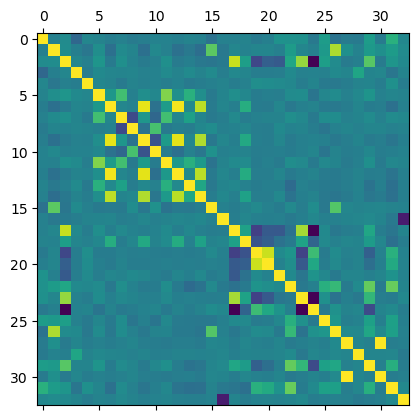

In [9]:
plt.matshow(correlation_matrix)
plt.show()

In [10]:
correlation_with_target = correlation_matrix['action_taken'].drop('action_taken')

In [11]:
correlation_with_target

loan_type                                   0.075778
loan_amount                                 0.076808
occupancy_type                              0.030551
census_tract                               -0.009410
applicant_ethnicity_1                       0.139385
co_applicant_ethnicity_1                   -0.050211
applicant_race_1                            0.101140
applicant_race_2                            0.000476
co_applicant_race_1                        -0.042892
co_applicant_race_2                        -0.013183
applicant_sex                               0.101093
co_applicant_sex                           -0.043072
applicant_age                              -0.016718
co_applicant_age                           -0.071599
income                                     -0.087902
lien_status                                -0.060844
applicant_credit_score_type                 0.849209
co_applicant_credit_score_type              0.210622
origination_charges                        -0.

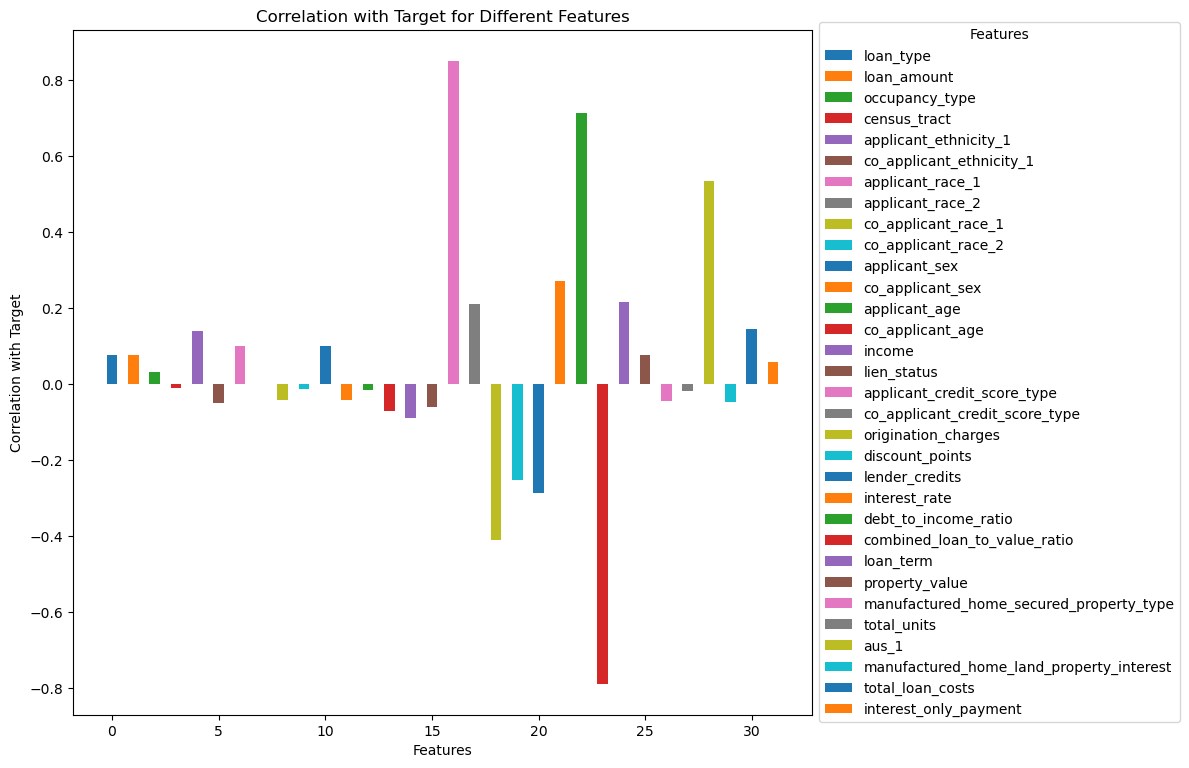

In [12]:
from itertools import cycle

plt.figure(figsize=(12, 8))
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
bar_width = 0.5 

for i, (feature, correlation) in enumerate(correlation_with_target.iteritems()):
    color = next(color_cycle)
    plt.bar(i, correlation, width=bar_width, color=color, label=feature)

plt.xticks()

plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation with Target for Different Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Features')

plt.tight_layout()
plt.show()


In [32]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
target_variable = "action_taken"

In [23]:
X = df_test.drop(columns=[target_variable])
y = df_test[target_variable]

In [7]:
print(X.shape, y.shape)

(1100, 32) (1100,)


In [8]:
seed = 123

In [9]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
cv = RepeatedStratifiedKFold(n_splits = 6, n_repeats = 3, random_state = seed)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv)

print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean accuracy: 0.560 (0.002)


In [10]:
model.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [15]:
import joblib

# Save the model to a file
filename = 'logistic_regression_model.pkl'
joblib.dump(model, filename)
print('Model saved to', filename)

Model saved to logistic_regression_model.pkl


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=seed)

In [12]:
X_test.shape

(220, 40)

In [13]:
X_train.shape

(880, 40)

In [14]:
# 1- loan originated
# 2- application approved but not accepted
# 3- application denied
# 4 - application withdrawn by applicant
# 5 - file closed for incompleteness
# 6 - purchased loan
# 7 - Pre-approval request denied
# 8 - pre-approval request approved but not accepted

y.value_counts()

action_taken
6    493
4    160
1    122
5     46
3     44
2     15
Name: count, dtype: int64

In [27]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
cv = RepeatedStratifiedKFold(n_splits = 6, n_repeats = 3, random_state=seed)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv)

print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X, y)

y_pred = model.predict(X)

Mean accuracy: 0.560 (0.002)


In [30]:
accuracy = accuracy_score(y, y_pred)

print(classification_report(y, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       156
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00       198
           5       0.00      0.00      0.00        54
           6       0.56      1.00      0.72       616

    accuracy                           0.56      1100
   macro avg       0.09      0.17      0.12      1100
weighted avg       0.31      0.56      0.40      1100



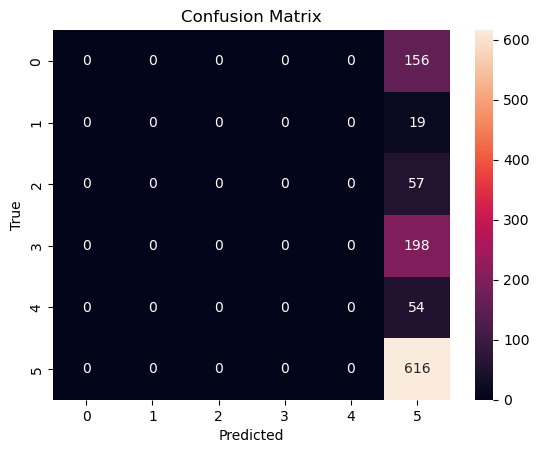

In [33]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [34]:
import joblib

# Save the model to a file
filename = 'logistic_regression_model.pkl'
joblib.dump(model, filename)
print('Model saved to', filename)

Model saved to logistic_regression_model.pkl
